## EDA

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import sys
import pandas as pd
import numpy as np


data_path = Path.cwd().parent / "data" / "processed" / "api_data_cleaned_merged.csv"
df = pd.read_csv(str(data_path),index_col=0)

In [2]:
df.index = df.Date
df = df.drop(columns=['Date'])

In [3]:
df

,CL=F,UUP,GLD,^VIX,^OVX,SHY,IEF,TIP
Date,,,,,,,,
2020-08-20,42.580002,22.342087,183.500000,22.719999,32.830002,77.537857,108.536964,104.350189
2020-08-21,42.340000,22.449070,182.029999,22.540001,33.680000,77.528900,108.617058,104.707382
2020-08-24,42.619999,22.484734,181.000000,22.370001,32.250000,77.519936,108.465836,104.915039
2020-08-25,43.349998,22.404493,181.220001,22.030001,33.029999,77.528900,108.207924,104.881805
2020-08-26,43.389999,22.377748,183.360001,23.270000,33.790001,77.528900,108.163422,105.089485
...,...,...,...,...,...,...,...,...
2025-08-14,63.959999,27.430000,307.250000,14.830000,35.959999,82.699997,95.419998,110.250000
2025-08-15,62.799999,27.340000,307.429993,15.090000,37.220001,82.669998,95.230003,110.040001
2025-08-18,63.419998,27.410000,306.950012,14.990000,32.150002,82.669998,95.139999,109.919998


In [4]:
returns_df = df.pct_change().dropna()
log_returns_df = np.log(df / df.shift(1)).dropna()

In [5]:
returns_df

,CL=F,UUP,GLD,^VIX,^OVX,SHY,IEF,TIP
Date,,,,,,,,
2020-08-21,-0.005636,0.004788,-0.008011,-0.007922,0.025891,-0.000116,0.000738,0.003423
2020-08-24,0.006613,0.001589,-0.005658,-0.007542,-0.042458,-0.000116,-0.001392,0.001983
2020-08-25,0.017128,-0.003569,0.001215,-0.015199,0.024186,0.000116,-0.002378,-0.000317
2020-08-26,0.000923,-0.001194,0.011809,0.056287,0.023009,0.000000,-0.000411,0.001980
2020-08-27,-0.008066,0.001195,-0.011562,0.051568,-0.001480,-0.000116,-0.003536,-0.003952
...,...,...,...,...,...,...,...,...
2025-08-14,0.020910,0.003659,-0.006339,0.023464,0.063276,-0.001087,-0.003238,-0.002984
2025-08-15,-0.018136,-0.003281,0.000586,0.017532,0.035039,-0.000363,-0.001991,-0.001905
2025-08-18,0.009873,0.002560,-0.001561,-0.006627,-0.136217,0.000000,-0.000945,-0.001091


In [6]:
returns_df.describe().T[["mean","50%","std","min","max"]]

,mean,50%,std,min,max
CL=F,0.000581,0.002028,0.023336,-0.130629,0.084814
UUP,0.000174,0.000360,0.004533,-0.022857,0.016157
GLD,0.000457,0.000513,0.009493,-0.044271,0.036991
^VIX,0.002787,-0.007542,0.081434,-0.357539,0.740391
^OVX,0.002074,-0.004425,0.066717,-0.267460,0.889049
SHY,0.000053,0.000000,0.001213,-0.005088,0.009974
IEF,-0.000090,-0.000173,0.004852,-0.017770,0.022525
TIP,0.000051,0.000156,0.003960,-0.016839,0.017671


In [7]:
returns_df.isna().sum()

CL=F    0
UUP     0
GLD     0
^VIX    0
^OVX    0
SHY     0
IEF     0
TIP     0
dtype: int64

In [8]:
returns_df.skew()

CL=F   -0.433779
UUP    -0.302842
GLD    -0.122931
^VIX    2.187153
^OVX    2.500489
SHY     0.699603
IEF     0.187373
TIP     0.113066
dtype: float64

<Axes: title={'center': 'Crude Oil Futures (CL=F)'}, xlabel='Date'>

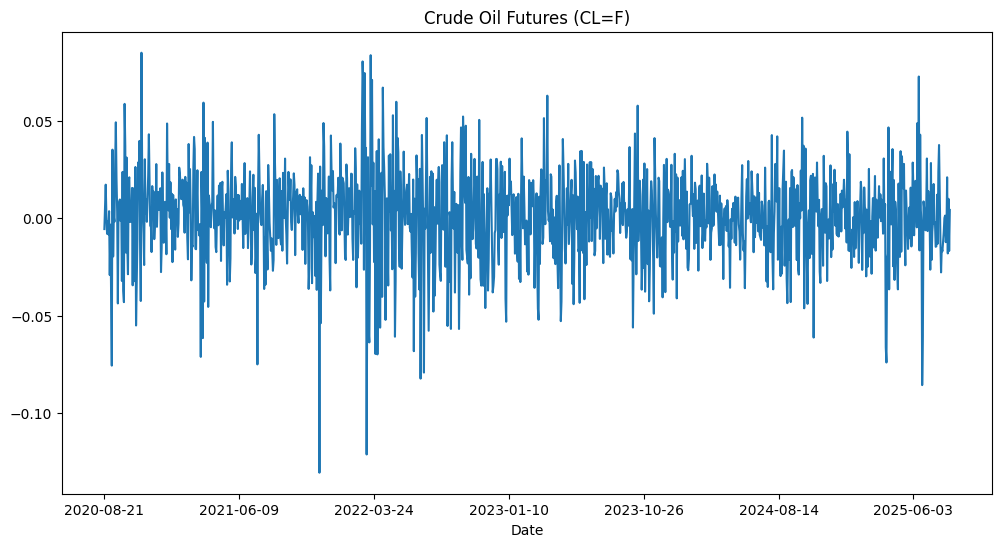

In [9]:
returns_df['CL=F'].plot(figsize=(12,6), title="Crude Oil Futures (CL=F)")

<Axes: title={'center': '^VIX'}, xlabel='Date'>

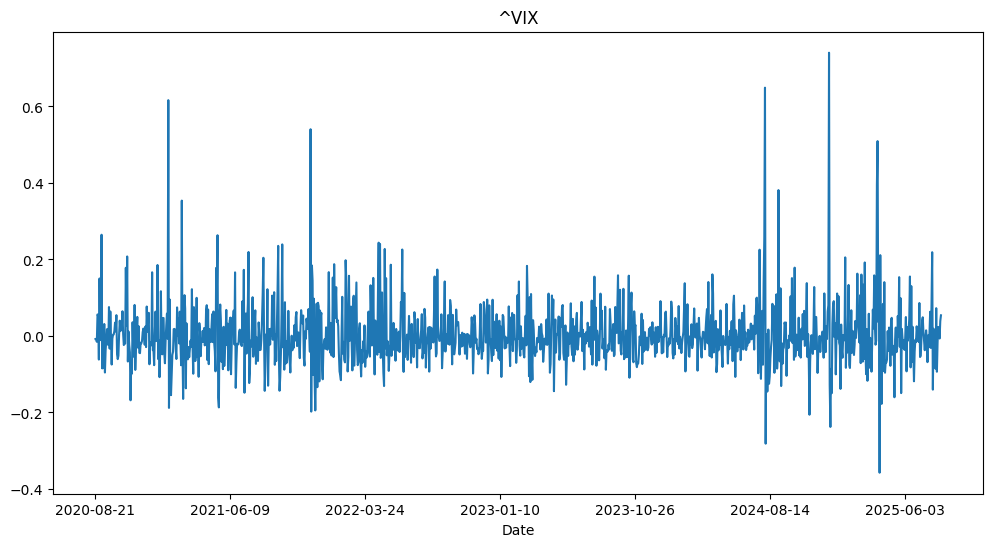

In [10]:
returns_df['^VIX'].plot(figsize=(12,6), title="^VIX")

<Axes: xlabel='CL=F', ylabel='Count'>

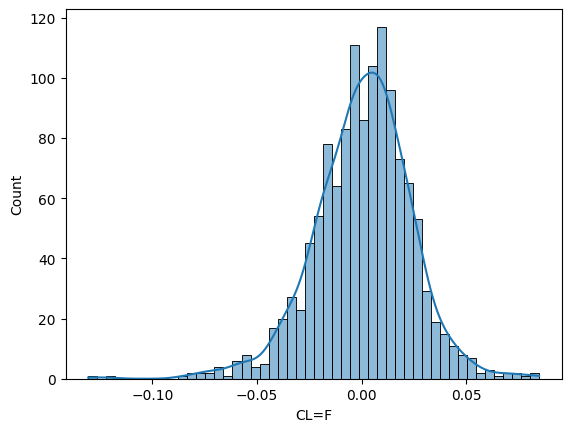

In [11]:
sns.histplot(returns_df['CL=F'], bins=50, kde=True)

<Axes: xlabel='CL=F'>

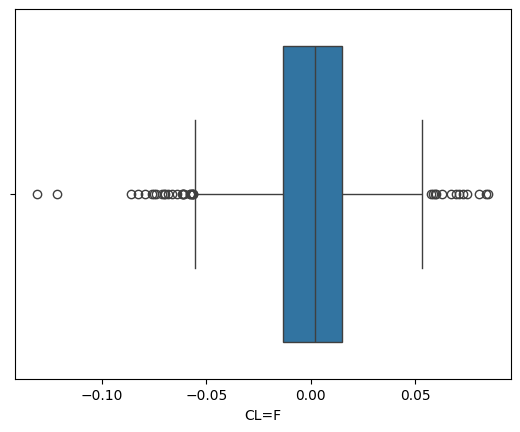

In [12]:
sns.boxplot(x=returns_df['CL=F'])

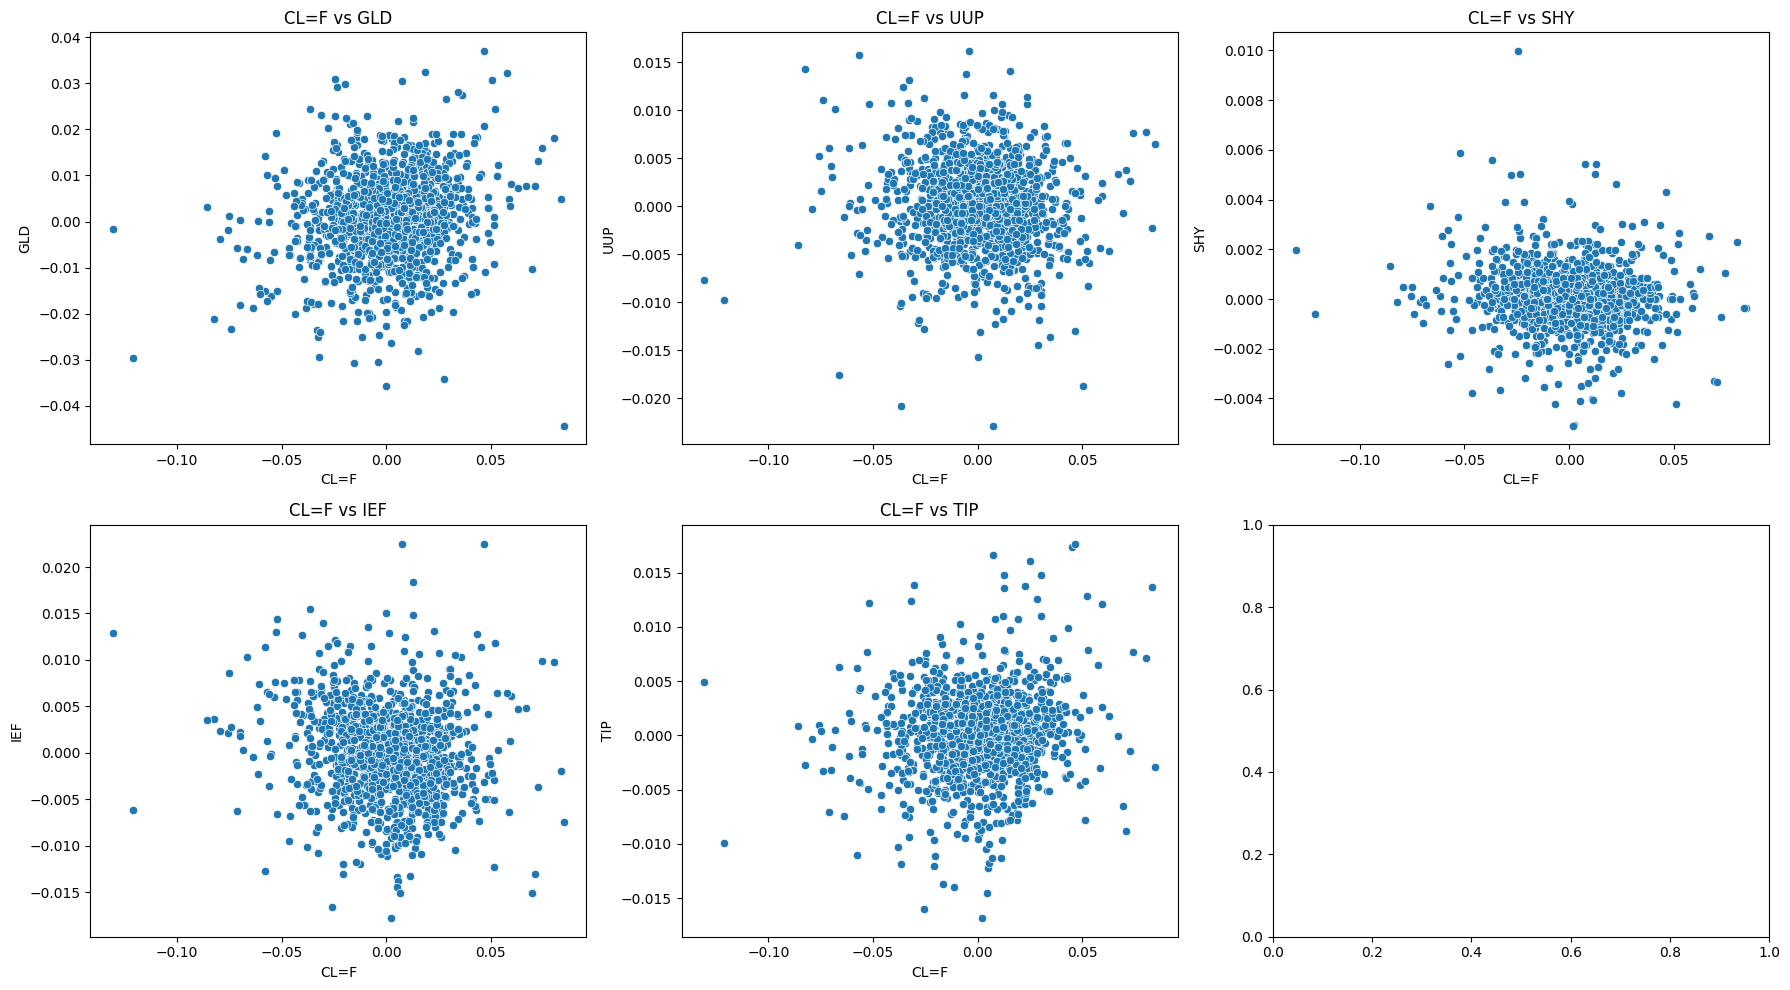

In [13]:
cols = ['CL=F','GLD','UUP','SHY','IEF','TIP']
subset = returns_df[cols]

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

for i, col in enumerate(cols[1:]):  # skip CL=F for x-axis
    sns.scatterplot(x=subset['CL=F'], y=subset[col], ax=axes[i])
    axes[i].set_title(f"CL=F vs {col}")

plt.tight_layout()
plt.show()

In [14]:
cum_returns = (1 + returns_df).cumprod()

rolling_window = 21  # 1 month
rolling_vol = returns_df.rolling(rolling_window).std() * np.sqrt(252)  # annualized volatility
rolling_mean = returns_df.rolling(rolling_window).mean() * 252  # annualized mean

running_max = cum_returns.cummax()
drawdowns = cum_returns / running_max - 1

In [15]:
cum_returns.columns

Index(['CL=F', 'UUP', 'GLD', '^VIX', '^OVX', 'SHY', 'IEF', 'TIP'], dtype='object')

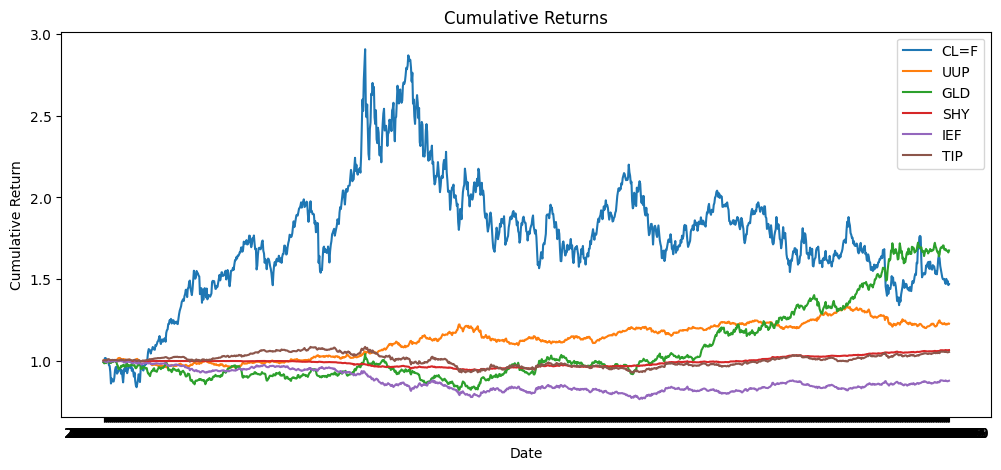

In [16]:
plt.figure(figsize=(12,5))
for col in ['CL=F', 'UUP', 'GLD', 'SHY', 'IEF', 'TIP']:
    plt.plot(cum_returns.index, cum_returns[col], label=col)
plt.title("Cumulative Returns")
plt.xlabel("Date")
plt.ylabel("Cumulative Return")
plt.legend()
plt.show()

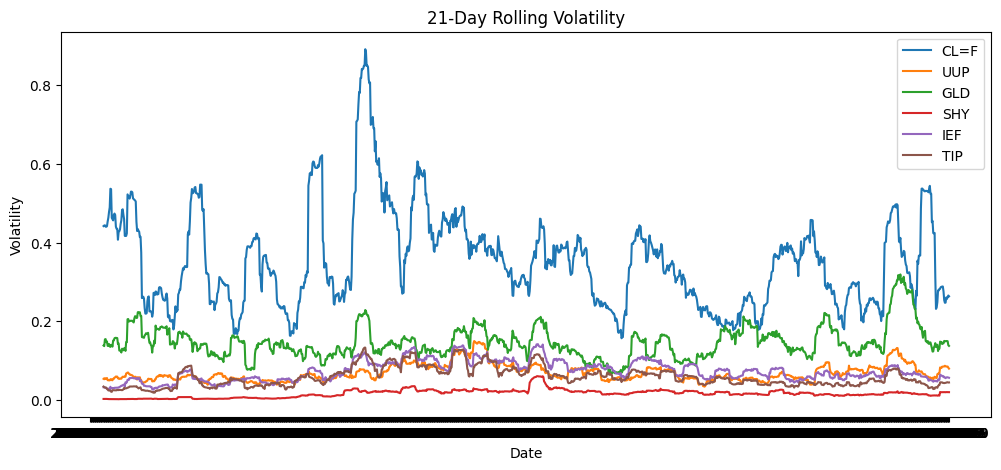

In [17]:
plt.figure(figsize=(12,5))
for col in ['CL=F', 'UUP', 'GLD', 'SHY', 'IEF', 'TIP']:
    plt.plot(rolling_vol.index, rolling_vol[col], label=col)
plt.title(f"{rolling_window}-Day Rolling Volatility")
plt.xlabel("Date")
plt.ylabel("Volatility")
plt.legend()
plt.show()

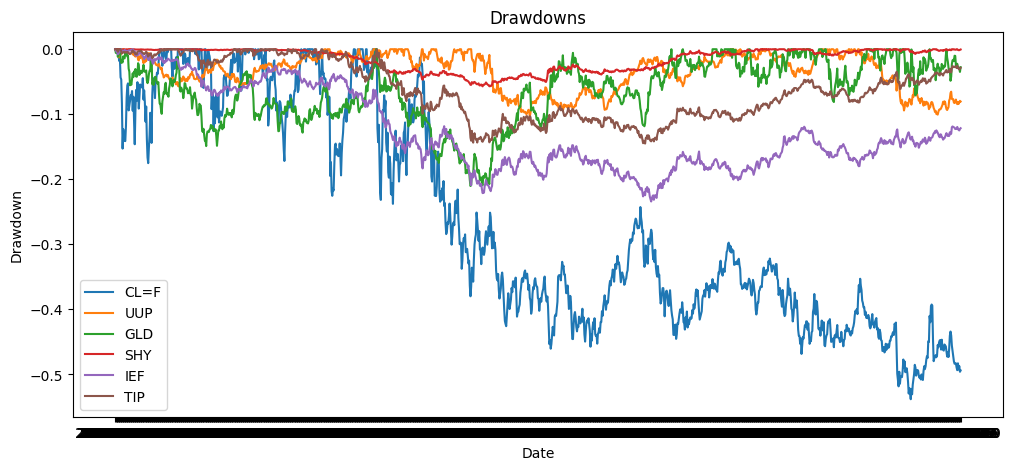

In [18]:
plt.figure(figsize=(12,5))
for col in ['CL=F', 'UUP', 'GLD', 'SHY', 'IEF', 'TIP']:
    plt.plot(drawdowns.index, drawdowns[col], label=col)
plt.title("Drawdowns")
plt.xlabel("Date")
plt.ylabel("Drawdown")
plt.legend()
plt.show()

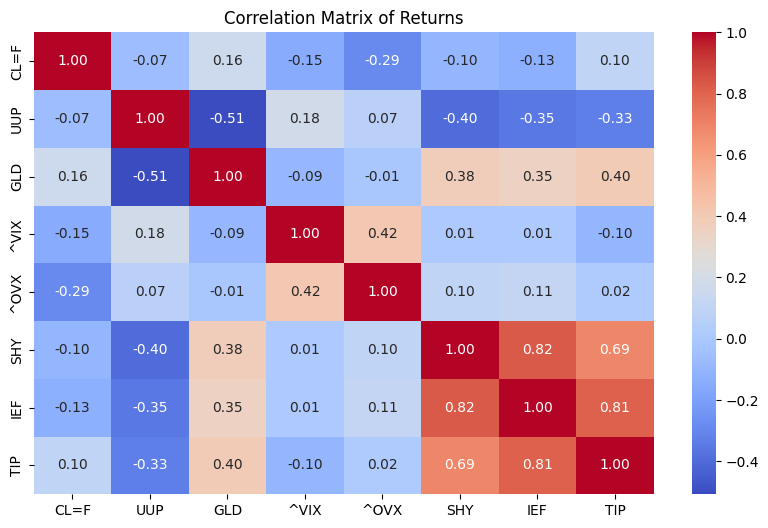

In [19]:
plt.figure(figsize=(10,6))
sns.heatmap(returns_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix of Returns")
plt.show()